Dans ce notebook nous allons tester le modèle Inception V3.

Introduction aux modèles Inception :

L'Inception V3 est un modèle d'apprentissage en profondeur basé sur les réseaux de neurones convolutifs, qui est utilisé pour la classification des images. Inception V3 est une version supérieure du modèle de base Inception V1 qui a été introduit sous le nom de GoogLeNet en 2014. Comme son nom l'indique, il a été développé par une équipe de Google.

Qu'est-ce qui rend le modèle Inception V3 meilleur ?

L'Inception V3 n'est que la version avancée et optimisée du modèle Inception V1. Le modèle Inception V3 utilisait plusieurs techniques d'optimisation du réseau pour une meilleure adaptation du modèle.

Il a une plus grande efficacité

Il dispose d'un réseau plus profond par rapport aux modèles Inception V1 et V2, mais sa vitesse n'est pas compromise.
C'est moins cher en calcul.
Il utilise des classificateurs auxiliaires comme régularisation.

Architecture du modèle Inception V3 :

Le modèle inception v3 a été publié en 2015, il a un total de 42 couches ce qui est un peu plus élevé que les modèles inception V1 et V2 précédents et un taux d'erreur inférieur à ses prédécesseurs. L'efficacité de ce modèle est vraiment impressionnante.

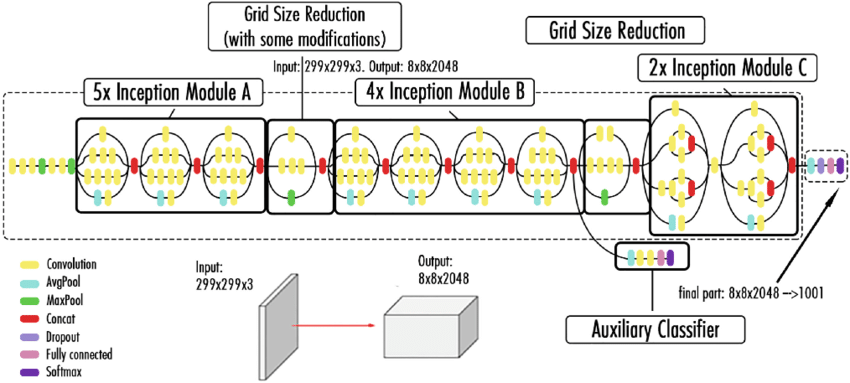

In [1]:
import glob
import matplotlib
from matplotlib import pyplot as plt
import matplotlib.image as mpimg
import numpy as np
from tensorflow.keras import models
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D, MaxPool2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint
import cv2
import tensorflow as tf
import tensorflow.keras.backend as K

In [2]:
# example of loading the vgg16 model
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model

# new_input = Input(shape=(180, 180, 3))
# # load model
# model = VGG16(include_top=True, weights=None, input_tensor=new_input, classes=3, classifier_activation="softmax")

def create_model(input_shape, n_classes, optimizer, fine_tune=0):
    
    # Include_top is set to False, in order to exclude the model's fully-connected layers.
    conv_base = InceptionV3(classes=n_classes,classifier_activation="softmax",
                     weights=None,input_shape=input_shape)

#     Compiles the model for training.
    conv_base.compile(optimizer=optimizer, 
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    
    
    return conv_base

In [3]:
input_shape = (299, 299, 1)
from tensorflow.keras.optimizers import Adam
optim_1 = Adam(learning_rate=0.000161803398875)
n_classes=3


# First we'll train the model without Fine-tuning
InceptionV3 = create_model(input_shape, n_classes, optim_1, fine_tune=0)
InceptionV3.build(input_shape)


In [4]:
DIM = 299
train_datagen = ImageDataGenerator(zoom_range=[0.65, 0.8])
test_datagen = ImageDataGenerator()
batch_size = 10
training_set = train_datagen.flow_from_directory(r'C:\Users\smonn\Desktop\T8-AI&BigData_pdf\chest_Xray_3_class\train',
                                                 target_size = (DIM, DIM),
                                                 batch_size = batch_size,
                                                 class_mode = 'categorical',
                                                 color_mode="grayscale")
test_set = test_datagen.flow_from_directory(r'C:\Users\smonn\Desktop\T8-AI&BigData_pdf\chest_Xray_3_class\test',
                                            target_size = (DIM,DIM),
                                            batch_size = batch_size,
                                            class_mode = 'categorical',
                                            color_mode="grayscale")

Found 3974 images belonging to 3 classes.
Found 1858 images belonging to 3 classes.


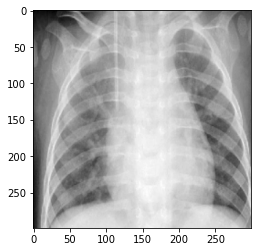

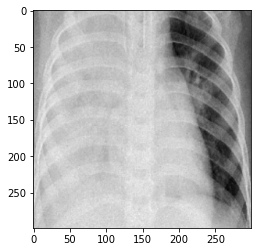

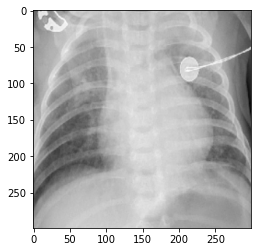

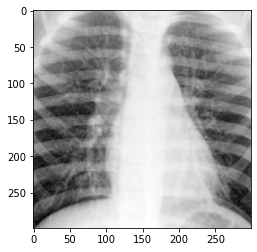

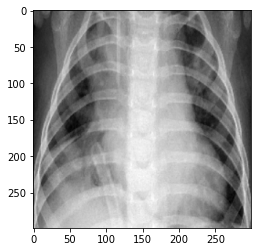

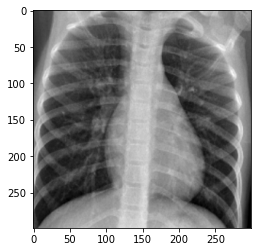

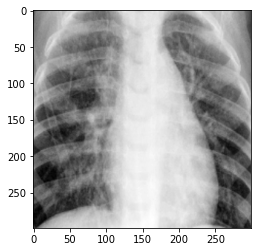

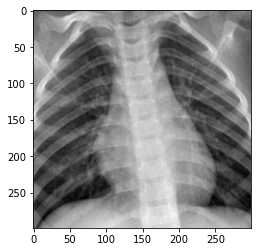

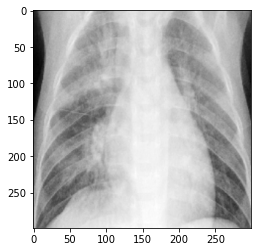

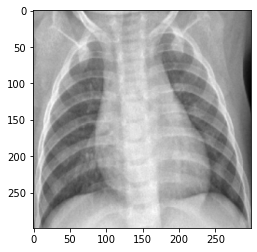

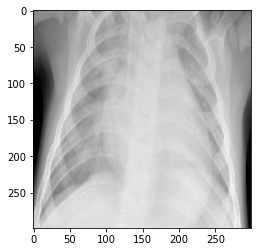

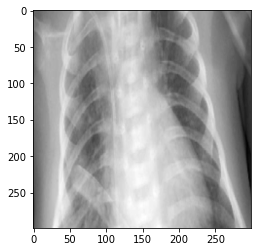

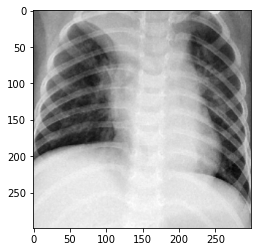

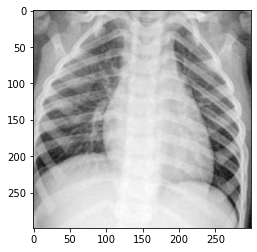

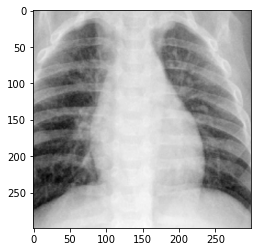

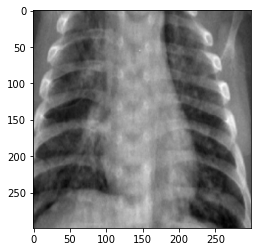

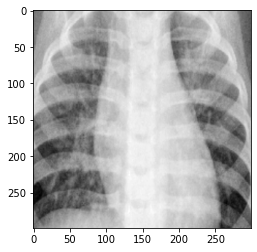

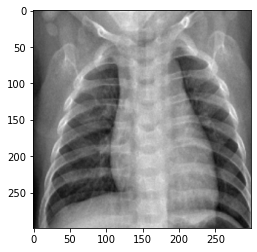

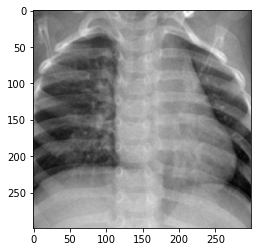

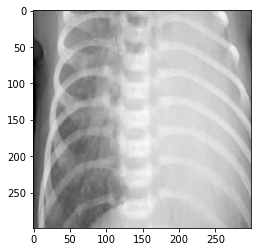

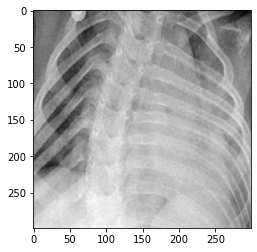

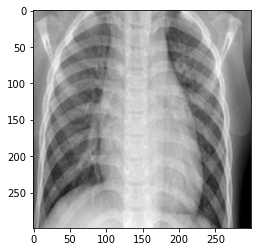

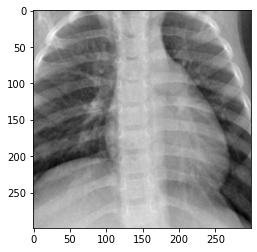

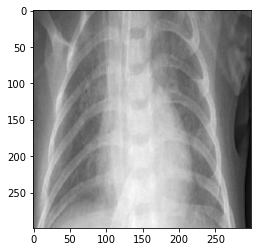

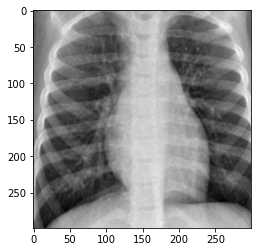

In [5]:
for _ in range(25):
    img, label = training_set.next()
    #  (1,256,256,3)
    plt.imshow(img[0],cmap = plt.cm.gray)
    plt.show()

In [6]:
from keras.callbacks import ModelCheckpoint, EarlyStopping

checkpoint = ModelCheckpoint(filepath="InceptionV3-version-2.h5", 
                               monitor = 'val_accuracy',
                               verbose=1, 
                               save_best_only=True)

early = EarlyStopping(monitor='val_accuracy', min_delta=0, patience=250, verbose=1, mode='auto')

history = InceptionV3.fit(training_set,
                    batch_size = 100,
                    epochs = 600,
                    callbacks=[checkpoint, early],
                    validation_data = test_set,
                    validation_batch_size = 50, validation_steps=10)

Epoch 1/600
398/398 [==============================] - ETA: 0s - loss: 0.8361 - accuracy: 0.6037
Epoch 1: val_accuracy improved from -inf to 0.45000, saving model to InceptionV3-version-2.h5
398/398 [==============================] - 82s 152ms/step - loss: 0.8361 - accuracy: 0.6037 - val_loss: 1.0487 - val_accuracy: 0.4500
Epoch 2/600
398/398 [==============================] - ETA: 0s - loss: 0.6960 - accuracy: 0.6623
Epoch 2: val_accuracy improved from 0.45000 to 0.78000, saving model to InceptionV3-version-2.h5
398/398 [==============================] - 44s 109ms/step - loss: 0.6960 - accuracy: 0.6623 - val_loss: 0.7639 - val_accuracy: 0.7800
Epoch 3/600
398/398 [==============================] - ETA: 0s - loss: 0.6499 - accuracy: 0.6850
Epoch 3: val_accuracy did not improve from 0.78000
398/398 [==============================] - 45s 112ms/step - loss: 0.6499 - accuracy: 0.6850 - val_loss: 1.0231 - val_accuracy: 0.7800
Epoch 4/600
398/398 [==============================] - ETA: 0s - 

Epoch 58/600
398/398 [==============================] - ETA: 0s - loss: 0.0644 - accuracy: 0.9786
Epoch 58: val_accuracy did not improve from 0.90000
398/398 [==============================] - 42s 106ms/step - loss: 0.0644 - accuracy: 0.9786 - val_loss: 0.5389 - val_accuracy: 0.8600
Epoch 59/600
398/398 [==============================] - ETA: 0s - loss: 0.0550 - accuracy: 0.9806
Epoch 59: val_accuracy did not improve from 0.90000
398/398 [==============================] - 42s 105ms/step - loss: 0.0550 - accuracy: 0.9806 - val_loss: 0.7057 - val_accuracy: 0.7900
Epoch 60/600
398/398 [==============================] - ETA: 0s - loss: 0.0703 - accuracy: 0.9741
Epoch 60: val_accuracy did not improve from 0.90000
398/398 [==============================] - 41s 104ms/step - loss: 0.0703 - accuracy: 0.9741 - val_loss: 0.6702 - val_accuracy: 0.7800
Epoch 61/600
398/398 [==============================] - ETA: 0s - loss: 0.0735 - accuracy: 0.9718
Epoch 61: val_accuracy did not improve from 0.9000

Epoch 87/600
398/398 [==============================] - ETA: 0s - loss: 0.0422 - accuracy: 0.9864
Epoch 87: val_accuracy did not improve from 0.91000
398/398 [==============================] - 42s 105ms/step - loss: 0.0422 - accuracy: 0.9864 - val_loss: 0.6252 - val_accuracy: 0.8200
Epoch 88/600
398/398 [==============================] - ETA: 0s - loss: 0.0352 - accuracy: 0.9874
Epoch 88: val_accuracy did not improve from 0.91000
398/398 [==============================] - 41s 104ms/step - loss: 0.0352 - accuracy: 0.9874 - val_loss: 0.9687 - val_accuracy: 0.8100
Epoch 89/600
398/398 [==============================] - ETA: 0s - loss: 0.0471 - accuracy: 0.9829
Epoch 89: val_accuracy did not improve from 0.91000
398/398 [==============================] - 41s 104ms/step - loss: 0.0471 - accuracy: 0.9829 - val_loss: 0.8570 - val_accuracy: 0.7400
Epoch 90/600
398/398 [==============================] - ETA: 0s - loss: 0.0204 - accuracy: 0.9930
Epoch 90: val_accuracy did not improve from 0.9100

Epoch 116/600
398/398 [==============================] - ETA: 0s - loss: 0.0250 - accuracy: 0.9912
Epoch 116: val_accuracy did not improve from 0.91000
398/398 [==============================] - 42s 105ms/step - loss: 0.0250 - accuracy: 0.9912 - val_loss: 0.8320 - val_accuracy: 0.7900
Epoch 117/600
398/398 [==============================] - ETA: 0s - loss: 0.0274 - accuracy: 0.9914
Epoch 117: val_accuracy did not improve from 0.91000
398/398 [==============================] - 41s 103ms/step - loss: 0.0274 - accuracy: 0.9914 - val_loss: 1.3607 - val_accuracy: 0.5700
Epoch 118/600
398/398 [==============================] - ETA: 0s - loss: 0.0345 - accuracy: 0.9867
Epoch 118: val_accuracy did not improve from 0.91000
398/398 [==============================] - 41s 103ms/step - loss: 0.0345 - accuracy: 0.9867 - val_loss: 0.6225 - val_accuracy: 0.8100
Epoch 119/600
398/398 [==============================] - ETA: 0s - loss: 0.0048 - accuracy: 0.9992
Epoch 119: val_accuracy did not improve fro

Epoch 145/600
398/398 [==============================] - ETA: 0s - loss: 0.0236 - accuracy: 0.9909
Epoch 145: val_accuracy did not improve from 0.91000
398/398 [==============================] - 42s 106ms/step - loss: 0.0236 - accuracy: 0.9909 - val_loss: 1.0193 - val_accuracy: 0.7700
Epoch 146/600
398/398 [==============================] - ETA: 0s - loss: 0.0301 - accuracy: 0.9892
Epoch 146: val_accuracy did not improve from 0.91000
398/398 [==============================] - 41s 103ms/step - loss: 0.0301 - accuracy: 0.9892 - val_loss: 1.0943 - val_accuracy: 0.8000
Epoch 147/600
398/398 [==============================] - ETA: 0s - loss: 0.0142 - accuracy: 0.9965
Epoch 147: val_accuracy did not improve from 0.91000
398/398 [==============================] - 41s 104ms/step - loss: 0.0142 - accuracy: 0.9965 - val_loss: 0.7665 - val_accuracy: 0.7100
Epoch 148/600
398/398 [==============================] - ETA: 0s - loss: 0.0103 - accuracy: 0.9965
Epoch 148: val_accuracy did not improve fro

Epoch 174/600
398/398 [==============================] - ETA: 0s - loss: 0.0339 - accuracy: 0.9882
Epoch 174: val_accuracy did not improve from 0.91000
398/398 [==============================] - 41s 103ms/step - loss: 0.0339 - accuracy: 0.9882 - val_loss: 0.9863 - val_accuracy: 0.7700
Epoch 175/600
398/398 [==============================] - ETA: 0s - loss: 0.0066 - accuracy: 0.9980
Epoch 175: val_accuracy did not improve from 0.91000
398/398 [==============================] - 41s 103ms/step - loss: 0.0066 - accuracy: 0.9980 - val_loss: 0.8638 - val_accuracy: 0.8400
Epoch 176/600
398/398 [==============================] - ETA: 0s - loss: 0.0138 - accuracy: 0.9955
Epoch 176: val_accuracy did not improve from 0.91000
398/398 [==============================] - 41s 103ms/step - loss: 0.0138 - accuracy: 0.9955 - val_loss: 0.8240 - val_accuracy: 0.7800
Epoch 177/600
398/398 [==============================] - ETA: 0s - loss: 0.0152 - accuracy: 0.9950
Epoch 177: val_accuracy did not improve fro

Epoch 203/600
398/398 [==============================] - ETA: 0s - loss: 0.0115 - accuracy: 0.9957
Epoch 203: val_accuracy did not improve from 0.91000
398/398 [==============================] - 41s 103ms/step - loss: 0.0115 - accuracy: 0.9957 - val_loss: 0.8019 - val_accuracy: 0.8400
Epoch 204/600
398/398 [==============================] - ETA: 0s - loss: 0.0165 - accuracy: 0.9937
Epoch 204: val_accuracy did not improve from 0.91000
398/398 [==============================] - 41s 103ms/step - loss: 0.0165 - accuracy: 0.9937 - val_loss: 0.9648 - val_accuracy: 0.7400
Epoch 205/600
398/398 [==============================] - ETA: 0s - loss: 0.0152 - accuracy: 0.9950
Epoch 205: val_accuracy did not improve from 0.91000
398/398 [==============================] - 42s 105ms/step - loss: 0.0152 - accuracy: 0.9950 - val_loss: 1.1269 - val_accuracy: 0.8100
Epoch 206/600
398/398 [==============================] - ETA: 0s - loss: 0.0188 - accuracy: 0.9927
Epoch 206: val_accuracy did not improve fro

398/398 [==============================] - 41s 103ms/step - loss: 0.0146 - accuracy: 0.9942 - val_loss: 0.8931 - val_accuracy: 0.8200
Epoch 232/600
398/398 [==============================] - ETA: 0s - loss: 0.0099 - accuracy: 0.9967
Epoch 232: val_accuracy did not improve from 0.93000
398/398 [==============================] - 41s 103ms/step - loss: 0.0099 - accuracy: 0.9967 - val_loss: 1.2929 - val_accuracy: 0.7400
Epoch 233/600
398/398 [==============================] - ETA: 0s - loss: 0.0197 - accuracy: 0.9940
Epoch 233: val_accuracy did not improve from 0.93000
398/398 [==============================] - 43s 107ms/step - loss: 0.0197 - accuracy: 0.9940 - val_loss: 0.6270 - val_accuracy: 0.8100
Epoch 234/600
398/398 [==============================] - ETA: 0s - loss: 0.0094 - accuracy: 0.9962
Epoch 234: val_accuracy did not improve from 0.93000
398/398 [==============================] - 41s 103ms/step - loss: 0.0094 - accuracy: 0.9962 - val_loss: 0.9787 - val_accuracy: 0.7900
Epoch 23

Epoch 289/600
398/398 [==============================] - ETA: 0s - loss: 0.0025 - accuracy: 0.9990
Epoch 289: val_accuracy did not improve from 0.93000
398/398 [==============================] - 44s 110ms/step - loss: 0.0025 - accuracy: 0.9990 - val_loss: 0.7773 - val_accuracy: 0.8700
Epoch 290/600
398/398 [==============================] - ETA: 0s - loss: 0.0166 - accuracy: 0.9940
Epoch 290: val_accuracy did not improve from 0.93000
398/398 [==============================] - 41s 104ms/step - loss: 0.0166 - accuracy: 0.9940 - val_loss: 1.2501 - val_accuracy: 0.7400
Epoch 291/600
398/398 [==============================] - ETA: 0s - loss: 0.0253 - accuracy: 0.9917
Epoch 291: val_accuracy did not improve from 0.93000
398/398 [==============================] - 42s 105ms/step - loss: 0.0253 - accuracy: 0.9917 - val_loss: 0.6996 - val_accuracy: 0.8000
Epoch 292/600
398/398 [==============================] - ETA: 0s - loss: 0.0053 - accuracy: 0.9985
Epoch 292: val_accuracy did not improve fro

398/398 [==============================] - 41s 104ms/step - loss: 0.0157 - accuracy: 0.9955 - val_loss: 1.3752 - val_accuracy: 0.7500
Epoch 318/600
398/398 [==============================] - ETA: 0s - loss: 0.0099 - accuracy: 0.9967
Epoch 318: val_accuracy did not improve from 0.94000
398/398 [==============================] - 41s 104ms/step - loss: 0.0099 - accuracy: 0.9967 - val_loss: 1.0395 - val_accuracy: 0.8100
Epoch 319/600
398/398 [==============================] - ETA: 0s - loss: 0.0055 - accuracy: 0.9985
Epoch 319: val_accuracy did not improve from 0.94000
398/398 [==============================] - 42s 105ms/step - loss: 0.0055 - accuracy: 0.9985 - val_loss: 1.1818 - val_accuracy: 0.8100
Epoch 320/600
398/398 [==============================] - ETA: 0s - loss: 0.0039 - accuracy: 0.9985
Epoch 320: val_accuracy did not improve from 0.94000
398/398 [==============================] - 41s 103ms/step - loss: 0.0039 - accuracy: 0.9985 - val_loss: 0.8713 - val_accuracy: 0.8100
Epoch 32

Epoch 375/600
398/398 [==============================] - ETA: 0s - loss: 0.0061 - accuracy: 0.9975
Epoch 375: val_accuracy did not improve from 0.94000
398/398 [==============================] - 41s 104ms/step - loss: 0.0061 - accuracy: 0.9975 - val_loss: 0.8149 - val_accuracy: 0.7600
Epoch 376/600
398/398 [==============================] - ETA: 0s - loss: 0.0042 - accuracy: 0.9987
Epoch 376: val_accuracy did not improve from 0.94000
398/398 [==============================] - 41s 104ms/step - loss: 0.0042 - accuracy: 0.9987 - val_loss: 0.8750 - val_accuracy: 0.7700
Epoch 377/600
398/398 [==============================] - ETA: 0s - loss: 0.0077 - accuracy: 0.9972
Epoch 377: val_accuracy did not improve from 0.94000
398/398 [==============================] - 42s 104ms/step - loss: 0.0077 - accuracy: 0.9972 - val_loss: 1.1470 - val_accuracy: 0.7300
Epoch 378/600
398/398 [==============================] - ETA: 0s - loss: 0.0166 - accuracy: 0.9955
Epoch 378: val_accuracy did not improve fro

Epoch 404/600
398/398 [==============================] - ETA: 0s - loss: 0.0145 - accuracy: 0.9965
Epoch 404: val_accuracy did not improve from 0.94000
398/398 [==============================] - 41s 103ms/step - loss: 0.0145 - accuracy: 0.9965 - val_loss: 0.9994 - val_accuracy: 0.7400
Epoch 405/600
398/398 [==============================] - ETA: 0s - loss: 0.0049 - accuracy: 0.9987
Epoch 405: val_accuracy did not improve from 0.94000
398/398 [==============================] - 43s 109ms/step - loss: 0.0049 - accuracy: 0.9987 - val_loss: 0.8776 - val_accuracy: 0.7800
Epoch 406/600
398/398 [==============================] - ETA: 0s - loss: 0.0043 - accuracy: 0.9985
Epoch 406: val_accuracy did not improve from 0.94000
398/398 [==============================] - 41s 104ms/step - loss: 0.0043 - accuracy: 0.9985 - val_loss: 0.9278 - val_accuracy: 0.8300
Epoch 407/600
398/398 [==============================] - ETA: 0s - loss: 0.0033 - accuracy: 0.9985
Epoch 407: val_accuracy did not improve fro

Epoch 433/600
398/398 [==============================] - ETA: 0s - loss: 0.0041 - accuracy: 0.9987
Epoch 433: val_accuracy did not improve from 0.94000
398/398 [==============================] - 43s 108ms/step - loss: 0.0041 - accuracy: 0.9987 - val_loss: 0.6644 - val_accuracy: 0.8000
Epoch 434/600
398/398 [==============================] - ETA: 0s - loss: 0.0028 - accuracy: 0.9992
Epoch 434: val_accuracy did not improve from 0.94000
398/398 [==============================] - 42s 105ms/step - loss: 0.0028 - accuracy: 0.9992 - val_loss: 1.0586 - val_accuracy: 0.7200
Epoch 435/600
398/398 [==============================] - ETA: 0s - loss: 0.0086 - accuracy: 0.9972
Epoch 435: val_accuracy did not improve from 0.94000
398/398 [==============================] - 41s 104ms/step - loss: 0.0086 - accuracy: 0.9972 - val_loss: 1.0463 - val_accuracy: 0.7400
Epoch 436/600
398/398 [==============================] - ETA: 0s - loss: 0.0045 - accuracy: 0.9982
Epoch 436: val_accuracy did not improve fro

398/398 [==============================] - 41s 103ms/step - loss: 0.0017 - accuracy: 0.9997 - val_loss: 0.9218 - val_accuracy: 0.8500
Epoch 462/600
398/398 [==============================] - ETA: 0s - loss: 0.0093 - accuracy: 0.9975
Epoch 462: val_accuracy did not improve from 0.94000
398/398 [==============================] - 41s 103ms/step - loss: 0.0093 - accuracy: 0.9975 - val_loss: 1.4078 - val_accuracy: 0.7600
Epoch 463/600
398/398 [==============================] - ETA: 0s - loss: 0.0064 - accuracy: 0.9980
Epoch 463: val_accuracy did not improve from 0.94000
398/398 [==============================] - 42s 105ms/step - loss: 0.0064 - accuracy: 0.9980 - val_loss: 0.7747 - val_accuracy: 0.8200
Epoch 464/600
398/398 [==============================] - ETA: 0s - loss: 0.0028 - accuracy: 0.9990
Epoch 464: val_accuracy did not improve from 0.94000
398/398 [==============================] - 41s 104ms/step - loss: 0.0028 - accuracy: 0.9990 - val_loss: 1.5082 - val_accuracy: 0.7400
Epoch 46

Epoch 519/600
398/398 [==============================] - ETA: 0s - loss: 0.0079 - accuracy: 0.9962
Epoch 519: val_accuracy did not improve from 0.94000
398/398 [==============================] - 41s 103ms/step - loss: 0.0079 - accuracy: 0.9962 - val_loss: 1.0542 - val_accuracy: 0.8000
Epoch 520/600
398/398 [==============================] - ETA: 0s - loss: 0.0068 - accuracy: 0.9977
Epoch 520: val_accuracy did not improve from 0.94000
398/398 [==============================] - 41s 102ms/step - loss: 0.0068 - accuracy: 0.9977 - val_loss: 0.6173 - val_accuracy: 0.8300
Epoch 521/600
398/398 [==============================] - ETA: 0s - loss: 0.0050 - accuracy: 0.9980
Epoch 521: val_accuracy did not improve from 0.94000
398/398 [==============================] - 42s 104ms/step - loss: 0.0050 - accuracy: 0.9980 - val_loss: 1.1261 - val_accuracy: 0.8400
Epoch 522/600
398/398 [==============================] - ETA: 0s - loss: 0.0118 - accuracy: 0.9972
Epoch 522: val_accuracy did not improve fro

In [4]:
InceptionV3.load_weights('InceptionV3.h5')

In [8]:
score = InceptionV3.evaluate(test_set)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

93/93 [==============================] - 9s 99ms/step - loss: 0.5629 - accuracy: 0.8229
Test loss: 0.5629357099533081
Test accuracy: 0.8229278922080994


In [9]:
InceptionV3.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 299, 299, 1  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 149, 149, 32  288         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 149, 149, 32  96         ['conv2d[0][0]']                 
 alization)                     )                                                      

 batch_normalization_5 (BatchNo  (None, 35, 35, 64)  192         ['conv2d_5[0][0]']               
 rmalization)                                                                                     
                                                                                                  
 batch_normalization_7 (BatchNo  (None, 35, 35, 64)  192         ['conv2d_7[0][0]']               
 rmalization)                                                                                     
                                                                                                  
 batch_normalization_10 (BatchN  (None, 35, 35, 96)  288         ['conv2d_10[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 batch_normalization_11 (BatchN  (None, 35, 35, 32)  96          ['conv2d_11[0][0]']              
 ormalizat

                                                                                                  
 batch_normalization_22 (BatchN  (None, 35, 35, 64)  192         ['conv2d_22[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_22 (Activation)     (None, 35, 35, 64)   0           ['batch_normalization_22[0][0]'] 
                                                                                                  
 conv2d_20 (Conv2D)             (None, 35, 35, 48)   13824       ['mixed1[0][0]']                 
                                                                                                  
 conv2d_23 (Conv2D)             (None, 35, 35, 96)   55296       ['activation_22[0][0]']          
                                                                                                  
 batch_nor

                                                                                                  
 max_pooling2d_2 (MaxPooling2D)  (None, 17, 17, 288)  0          ['mixed2[0][0]']                 
                                                                                                  
 mixed3 (Concatenate)           (None, 17, 17, 768)  0           ['activation_26[0][0]',          
                                                                  'activation_29[0][0]',          
                                                                  'max_pooling2d_2[0][0]']        
                                                                                                  
 conv2d_34 (Conv2D)             (None, 17, 17, 128)  98304       ['mixed3[0][0]']                 
                                                                                                  
 batch_normalization_34 (BatchN  (None, 17, 17, 128)  384        ['conv2d_34[0][0]']              
 ormalizat

                                                                  'activation_39[0][0]']          
                                                                                                  
 conv2d_44 (Conv2D)             (None, 17, 17, 160)  122880      ['mixed4[0][0]']                 
                                                                                                  
 batch_normalization_44 (BatchN  (None, 17, 17, 160)  480        ['conv2d_44[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_44 (Activation)     (None, 17, 17, 160)  0           ['batch_normalization_44[0][0]'] 
                                                                                                  
 conv2d_45 (Conv2D)             (None, 17, 17, 160)  179200      ['activation_44[0][0]']          
          

 ormalization)                                                                                    
                                                                                                  
 activation_54 (Activation)     (None, 17, 17, 160)  0           ['batch_normalization_54[0][0]'] 
                                                                                                  
 conv2d_55 (Conv2D)             (None, 17, 17, 160)  179200      ['activation_54[0][0]']          
                                                                                                  
 batch_normalization_55 (BatchN  (None, 17, 17, 160)  480        ['conv2d_55[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_55 (Activation)     (None, 17, 17, 160)  0           ['batch_normalization_55[0][0]'] 
          

                                                                                                  
 batch_normalization_65 (BatchN  (None, 17, 17, 192)  576        ['conv2d_65[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_65 (Activation)     (None, 17, 17, 192)  0           ['batch_normalization_65[0][0]'] 
                                                                                                  
 conv2d_61 (Conv2D)             (None, 17, 17, 192)  147456      ['mixed6[0][0]']                 
                                                                                                  
 conv2d_66 (Conv2D)             (None, 17, 17, 192)  258048      ['activation_65[0][0]']          
                                                                                                  
 batch_nor

                                                                                                  
 conv2d_70 (Conv2D)             (None, 17, 17, 192)  147456      ['mixed7[0][0]']                 
                                                                                                  
 conv2d_74 (Conv2D)             (None, 17, 17, 192)  258048      ['activation_73[0][0]']          
                                                                                                  
 batch_normalization_70 (BatchN  (None, 17, 17, 192)  576        ['conv2d_70[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 batch_normalization_74 (BatchN  (None, 17, 17, 192)  576        ['conv2d_74[0][0]']              
 ormalization)                                                                                    
          

 batch_normalization_76 (BatchN  (None, 8, 8, 320)   960         ['conv2d_76[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_78 (Activation)     (None, 8, 8, 384)    0           ['batch_normalization_78[0][0]'] 
                                                                                                  
 activation_79 (Activation)     (None, 8, 8, 384)    0           ['batch_normalization_79[0][0]'] 
                                                                                                  
 activation_82 (Activation)     (None, 8, 8, 384)    0           ['batch_normalization_82[0][0]'] 
                                                                                                  
 activation_83 (Activation)     (None, 8, 8, 384)    0           ['batch_normalization_83[0][0]'] 
          

                                                                                                  
 activation_91 (Activation)     (None, 8, 8, 384)    0           ['batch_normalization_91[0][0]'] 
                                                                                                  
 activation_92 (Activation)     (None, 8, 8, 384)    0           ['batch_normalization_92[0][0]'] 
                                                                                                  
 batch_normalization_93 (BatchN  (None, 8, 8, 192)   576         ['conv2d_93[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_85 (Activation)     (None, 8, 8, 320)    0           ['batch_normalization_85[0][0]'] 
                                                                                                  
 mixed9_1 

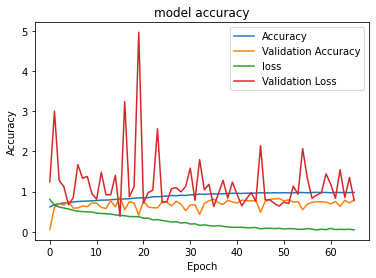

<Figure size 21600x21600 with 0 Axes>

In [10]:
plt.plot(history.history["accuracy"])
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Accuracy","Validation Accuracy","loss","Validation Loss"])
plt.figure(figsize=(300, 300))
plt.show()

In [11]:
ORIGINAL = r"C:\Users\smonn\Desktop\T8-AI&BigData_pdf\chest_Xray_3_class\val\PNEUMONIA_BACTERIA\person1947_bacteria_4876.jpeg"
# # img = image.load_img(ORIGINAL, target_size=(DIM, DIM))
# img = tf.keras.utils.load_img(ORIGINAL, color_mode="grayscale", target_size=(DIM, DIM))

img = cv2.imread(ORIGINAL)
img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
img = cv2.resize(img, (DIM,DIM))

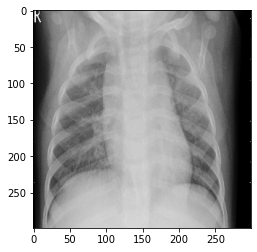

In [12]:
# plt.imshow(cv2.imread(ORIGINAL))
plt.imshow(img,cmap = plt.cm.gray)
plt.show()

In [13]:
# Prédiction d'images
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
images = np.vstack([x])
classes = np.argmax(InceptionV3.predict(images, batch_size=10), axis=-1)
classe_name = ""
if classes[0] == 0:
    classe_name = "NORMAL"
if classes[0] == 1:
    classe_name = "PNEUMONIA BACTERIA"
if classes[0] == 2:
    classe_name = "PNEUMONIA VIRUS"
print("La classe prédite est :",classe_name)

La classe prédite est : PNEUMONIA VIRUS


In [14]:
with tf.GradientTape() as tape:
  last_conv_layer = InceptionV3.get_layer('conv2d_93')
  iterate = tf.keras.models.Model([InceptionV3.inputs], [InceptionV3.output, last_conv_layer.output])
  model_out, last_conv_layer = iterate(x)
  class_out = model_out[:, np.argmax(model_out[0])]
  grads = tape.gradient(class_out, last_conv_layer)
#   pooled_grads = K.mean(grads, axis=(0, 1, 2))
  pooled_grads = K.mean(grads, axis=(0,1,2))

  
heatmap = tf.reduce_mean(tf.multiply(pooled_grads, last_conv_layer), axis=-1)

(1, 8, 8)


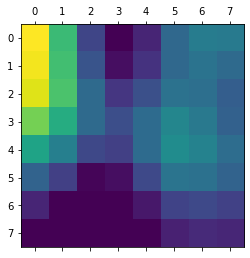

In [15]:
heatmap = np.maximum(heatmap, 0)
heatmap /= np.max(heatmap)
print(heatmap.shape)
heatmap = heatmap.reshape((8, 8))
plt.matshow(heatmap)
plt.show()

In [16]:
INTENSITY = 0.5

img = cv2.imread(ORIGINAL)
img = cv2.resize(img, (DIM, DIM))

heatmap = cv2.resize(heatmap, (DIM, DIM))

heatmap = cv2.applyColorMap(np.uint8(255*heatmap), cv2.COLORMAP_JET)

img = heatmap * INTENSITY + img

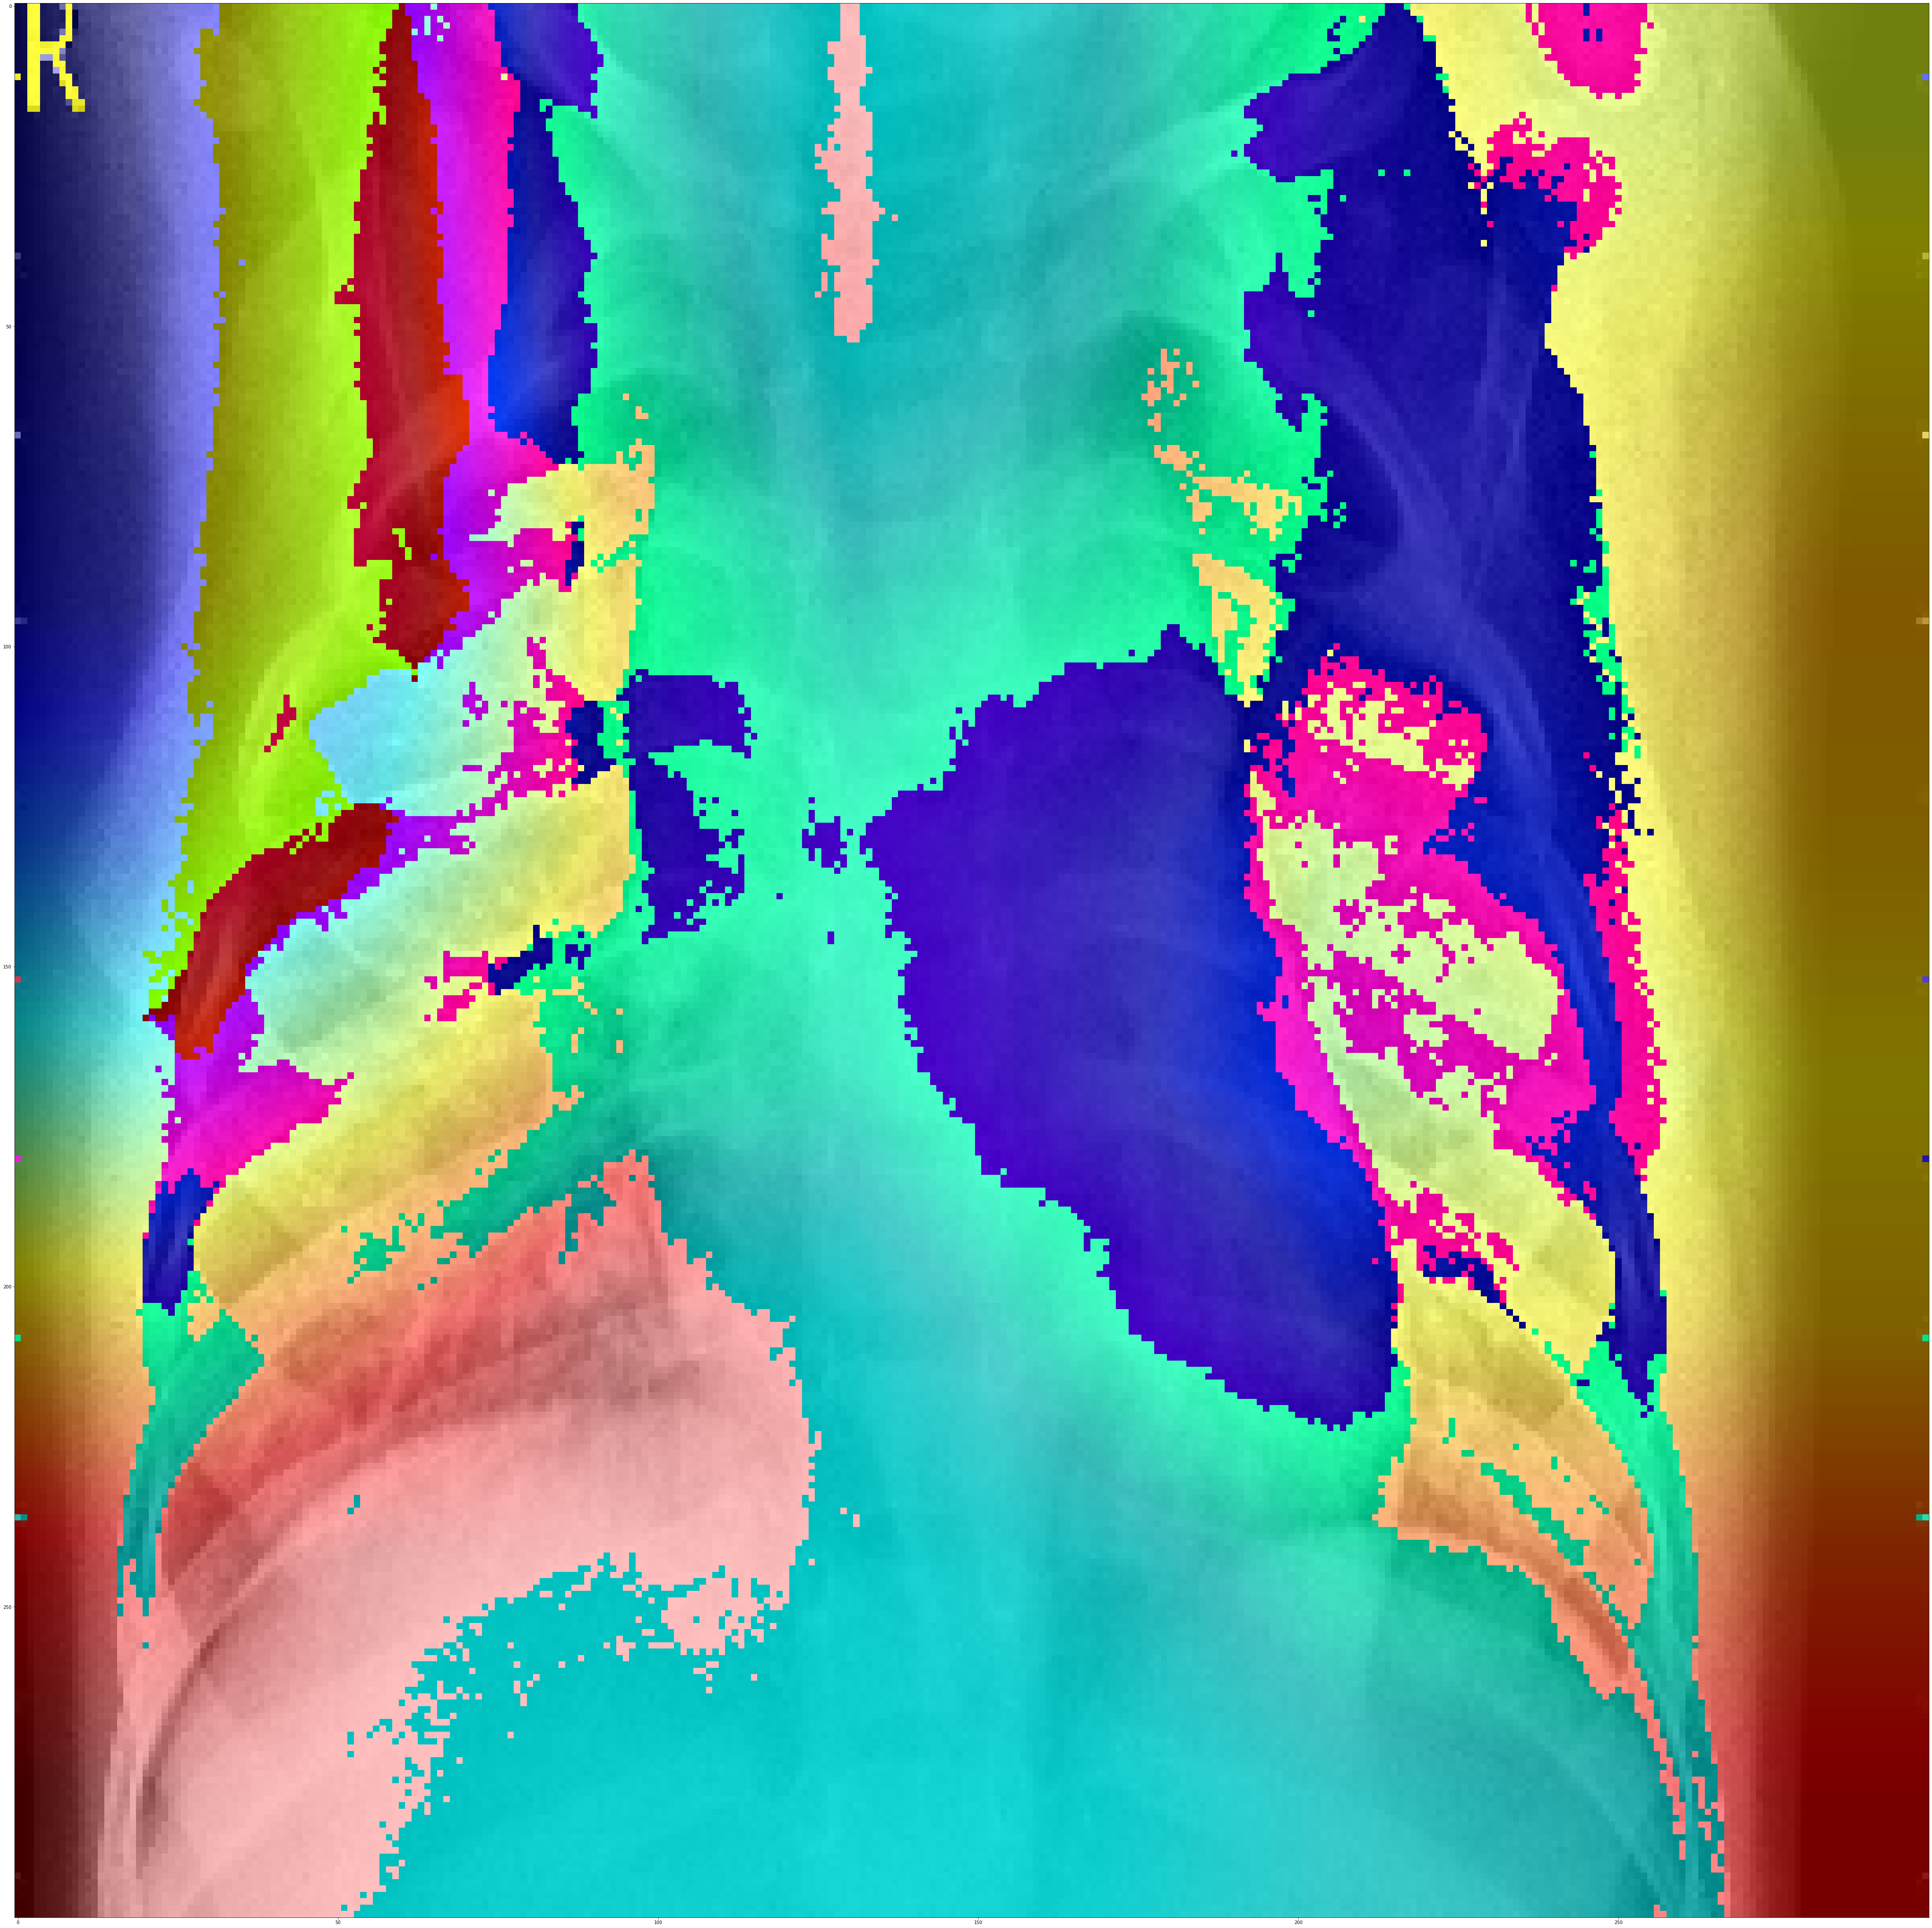

In [17]:
plt.figure(figsize=(80, 80))
plt.imshow(np.uint8(img))

plt.show()

# from google.colab.patches import cv2_imshow 
# cv2_imshow(np.uint8(255*heatmap))